Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: https://github.com/kazeulo/CMSC197-Machine-Learning.git

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# %matplotlib inline

In [4]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [7]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [10]:
# getting the top ten directors with most movies
# excluded the first one bcos director is 0
top10_directors = data.groupby('director_name', as_index=False).count().sort_values(
                            by='movie_title', ascending=False)[['director_name', 'movie_title']][1:11]  
top10_directors

,director_name,movie_title
2159,Steven Spielberg,26
2378,Woody Allen,22
392,Clint Eastwood,20
1478,Martin Scorsese,20
1903,Ridley Scott,17
2158,Steven Soderbergh,16
2102,Spike Lee,16
2221,Tim Burton,16
1862,Renny Harlin,15
1701,Oliver Stone,14


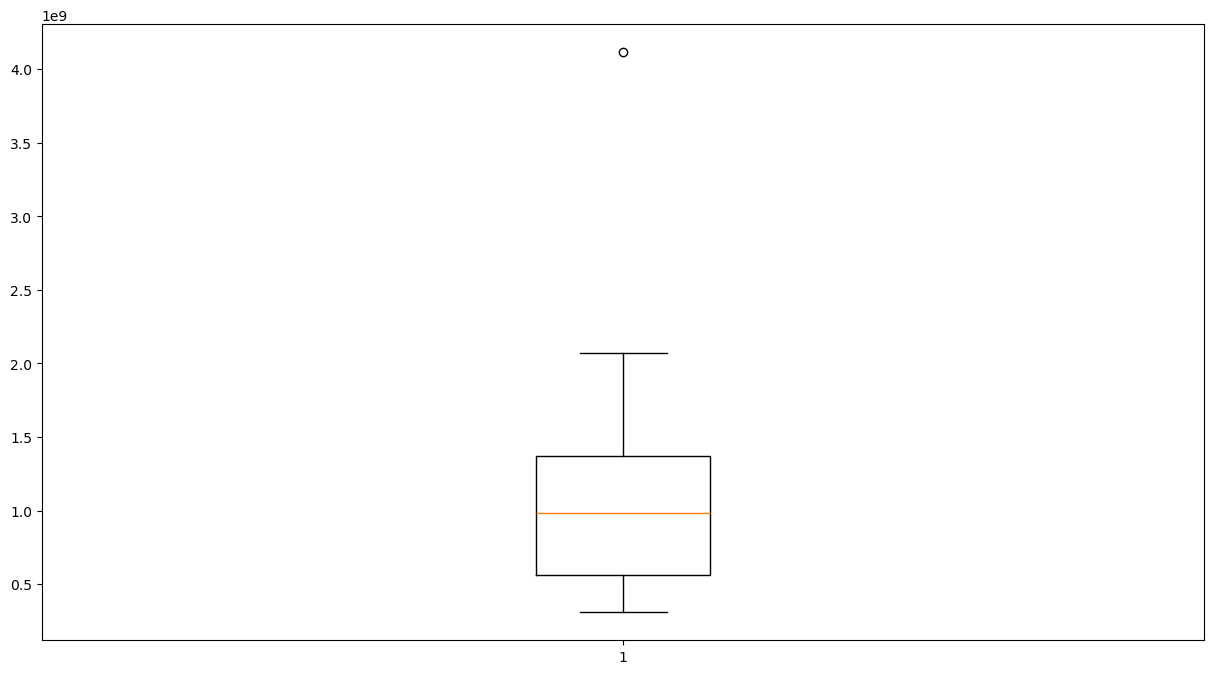

In [12]:
director_gross_earnings = data.groupby('director_name', as_index=False).sum()[['director_name', 'gross']]
top10dir_gross = pd.merge(top10_directors, director_gross_earnings, 
                               on='director_name').sort_values("gross", ascending=False)
top10dir_gross.drop('movie_title', inplace=True, axis=1)
plt.figure(figsize=(15,8))
plt.boxplot(top10dir_gross['gross'])
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

ValueError: Could not interpret value `IMDB_score` for `y`. An entry with this name does not appear in `data`.

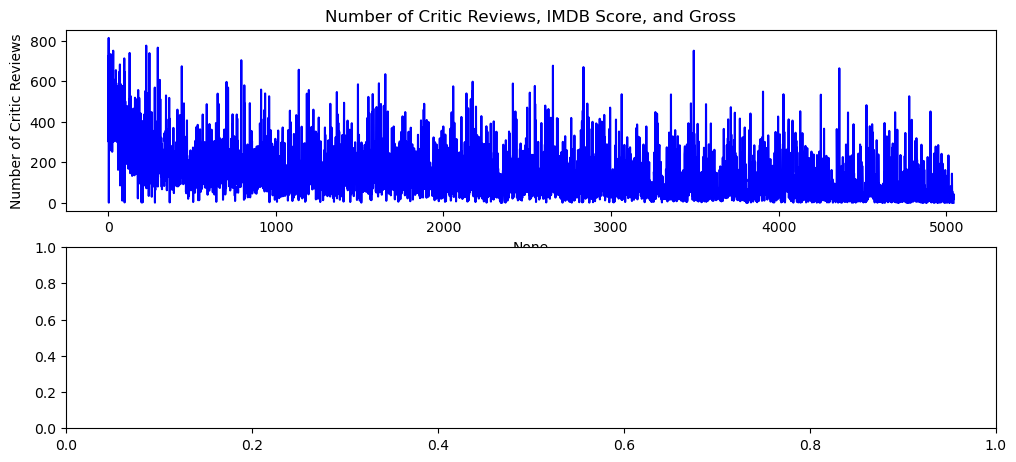

In [18]:
plt.figure(figsize=(12, 8))

# Plot num_critic_for_reviews
plt.subplot(3, 1, 1)
sns.lineplot(data=data, x=data.index, y='num_critic_for_reviews', color='blue')
plt.ylabel('Number of Critic Reviews')
plt.title('Number of Critic Reviews, IMDB Score, and Gross')

# Plot IMDB_score
plt.subplot(3, 1, 2)
sns.lineplot(data=data, x=data.index, y='IMDB_score', color='green')
plt.ylabel('IMDB Score')

# Plot gross
plt.subplot(3, 1, 3)
sns.lineplot(data=data, x=data.index, y='gross', color='red')
plt.ylabel('Gross')
plt.xlabel('Index')

# Adjust the layout
plt.tight_layout()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [6]:
data['sales'] = data.apply(lambda x: x.gross - x.budget, axis=1)
data['sales']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64

## Which directors garnered the most total sales?

In [7]:
most_sales = data.groupby("director_name", as_index=False).sum().sort_values(by='sales', ascending=False)
most_sales[['director_name', 'sales']][:11]

,director_name,sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08
1787,Peter Jackson,9.009693e+08
2221,Tim Burton,8.242755e+08
374,Christopher Nolan,8.082276e+08
1158,Jon Favreau,7.693815e+08
695,Francis Lawrence,7.555020e+08


The data above shows the top 10 directors who garnered the most total sales, with Steven Spielberg in on the first place.

## Plot sales and average likes as a scatterplot. Fit it with a line.

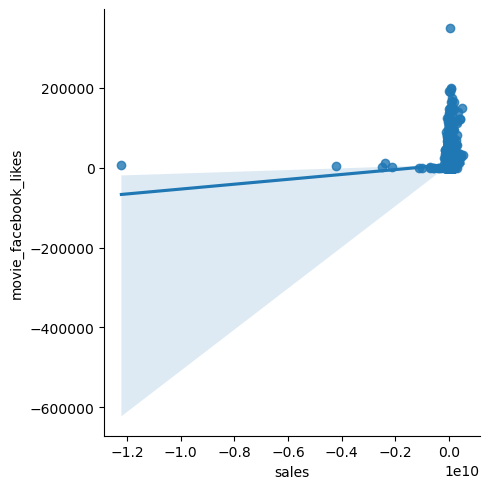

In [10]:
sns.lmplot(x='sales',y='movie_facebook_likes',data=data,fit_reg=True) 

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

Text(0.5, 1.0, 'Sales of Each Genre')

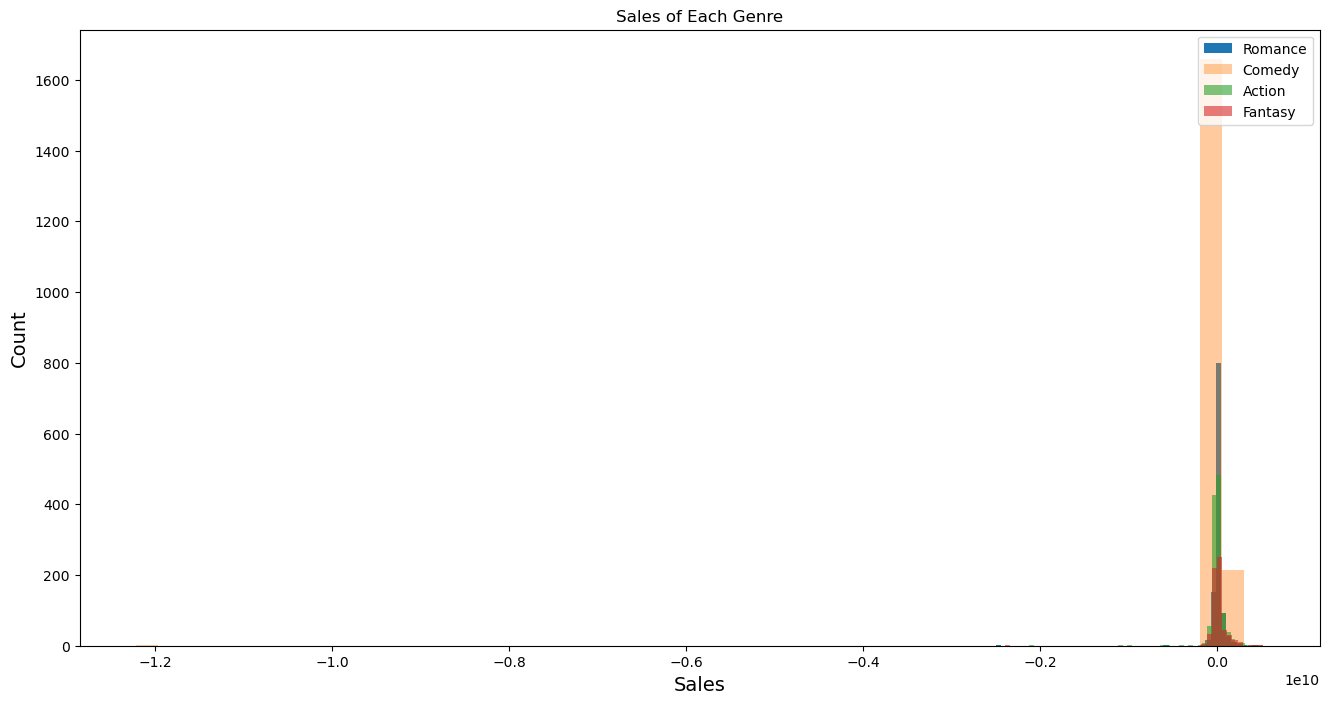

In [12]:
# gettings data by genre
romance = data[data['genres'].str.contains('Romance')]['sales']
comedy = data[data['genres'].str.contains('Comedy')]['sales']
action = data[data['genres'].str.contains('Action')]['sales']
fantasy = data[data['genres'].str.contains('Fantasy')]['sales']

plt.figure(figsize=(16,8))
plt.hist(romance, bins=50, alpha=1, label="Romance")
plt.hist(comedy, bins=50, alpha=0.4, label="Comedy")
plt.hist(action, bins=50, alpha=0.6, label="Action")
plt.hist(fantasy, bins=50, alpha=0.6, label="Fantasy")
plt.xlabel("Sales", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.title("Sales of Each Genre")

From the figure above, comedy is the most profitable genre followed by romance.

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [15]:
data['average_actor_likes'] = data[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data.head(10)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
5,5,b'John Carter',Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.0,-190641321.0,600.666667
6,6,b'Spider-Man 3',Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,...,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0,78530303.0,13000.000000
7,7,b'Tangled',Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,...,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000.0,-59192738.0,545.333333
8,8,b'Avengers: Age of Ultron',Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,...,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000.0,208991599.0,22000.000000
9,9,b'Harry Potter and the Half-Blood Prince',Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,...,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0,51956980.0,15333.333333


## Copying the whole dataframe

In [16]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [ ]:
for x in df.columns:
    if df[x].dtype == float or df[x].dtype == int:
        max = df[x].max()
        min = df[x].min()
        df[x] = (df[x] - min) / (max-min)

In [17]:
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667
